In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Any, Tuple

In [24]:
# Data Loading
X_model = pd.read_csv('../data/X_model.csv')
Y_model = pd.read_csv('../data/Y_model.csv')

# Combine X_model and Y_model
df = pd.concat([X_model, Y_model], axis=1)

In [27]:
X_c = df.filter(regex="c" + r"2022[0-9]*", axis=1).fillna(0)
X_t = df.filter(regex="t" + r"2022[0-9]*", axis=1).fillna(0)
X_s = df.filter(regex="s" + r"2022[0-9]*", axis=1).fillna(0)

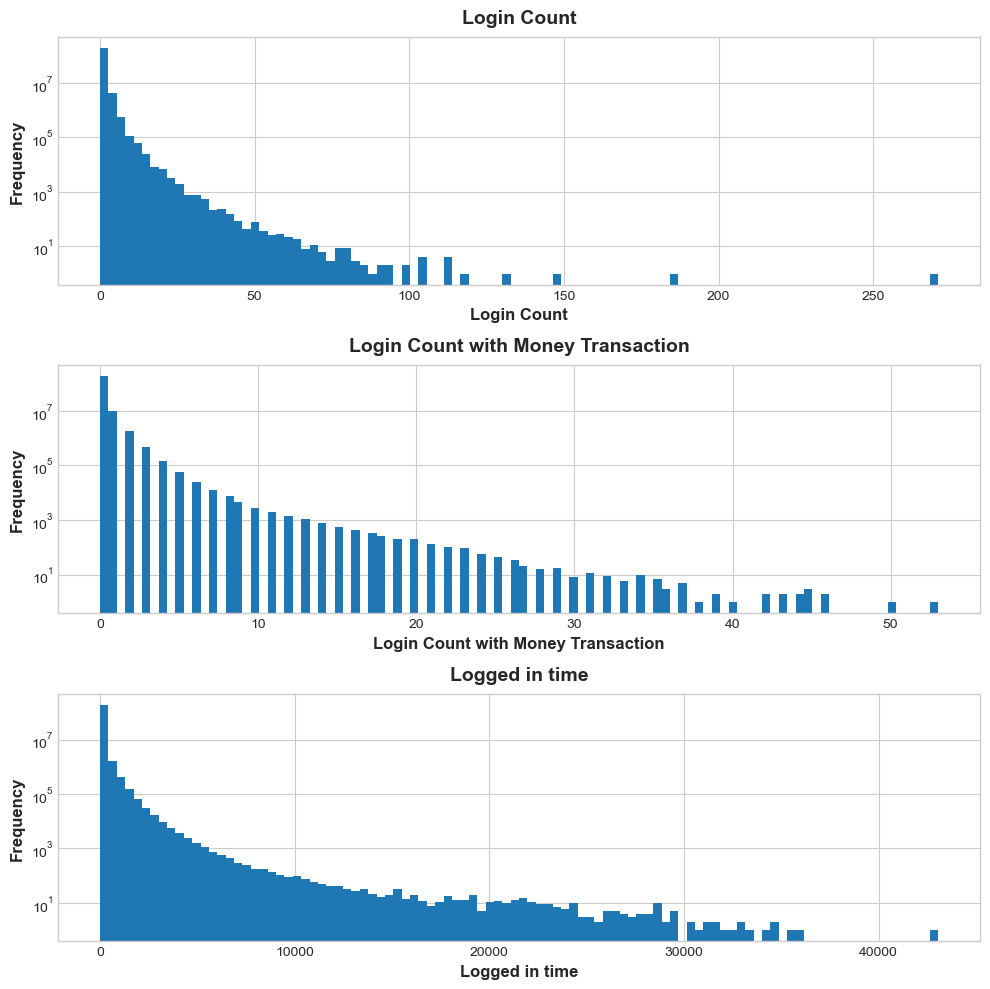

In [29]:
# Plot distribution of X_c, X_t, X_s in log scale
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes[0].set_title("Login Count")
axes[0].set_yscale('log')
axes[0].set_xlabel("Login Count")
axes[0].set_ylabel("Frequency")
axes[0].hist(X_c.values.flatten(), bins=100)
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_yscale('log')
axes[1].set_xlabel("Login Count with Money Transaction")
axes[1].set_ylabel("Frequency")
axes[1].hist(X_t.values.flatten(), bins=100)
axes[2].set_title("Logged in time")
axes[2].set_yscale('log')
axes[2].set_xlabel("Logged in time")
axes[2].set_ylabel("Frequency")
axes[2].hist(X_s.values.flatten(), bins=100)
plt.show()